In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns 

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [51]:
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [52]:
cols_to_use = ['Suburb', 'Rooms', 'Type' , 'Method' , 'SellerG' , 'Regionname', 'Propertycount', 'Distance' , 'CouncilArea', 'Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']

In [53]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [54]:
dataset.shape

(34857, 21)

In [55]:
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [56]:
dataset.shape

(34857, 15)

In [57]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [58]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

In [59]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [60]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())

In [61]:
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [64]:
dataset.dropna(inplace=True)

In [65]:
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [66]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [71]:
x = dataset.drop('Price',axis=1)
y = dataset['Price']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [74]:
reg.score(X_test,y_test)

0.1385368316159704

In [75]:

reg.score(X_train,y_train)

0.6827792395792723

In [79]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100)

In [80]:
lasso_reg.score(X_test,y_test)

0.6636111369404489

In [81]:
lasso_reg.score(X_train,y_train)

0.6766985624766824

In [104]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=49,max_iter=200,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=49, max_iter=200, tol=0.1)

In [105]:
ridge_reg.score(X_test,y_test)

0.6672730646613666

In [106]:
ridge_reg.score(X_train,y_train)

0.6624872752501653

In [91]:
from sklearn.metrics import mean_squared_error
y_pred = ridge_reg.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 132273414674.95776


In [94]:
test_mse = []
train_mse = []

for i in range(1, 100):
    lasso_reg = linear_model.Lasso(alpha=i,max_iter=100)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_pred))
    y_test_pred = lasso_reg.predict(X_train)
    train_mse.append(mean_squared_error(y_train,y_test_pred))
    

In [98]:
x = list(range(1,100))


Text(0.5, 0, 'alpha')

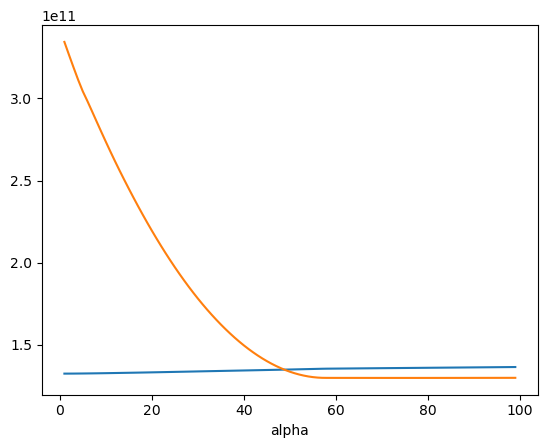

In [103]:
plt.plot(x,train_mse)
plt.plot(x,test_mse)
plt.xlabel('alpha')